<a href="https://colab.research.google.com/github/CristinaMarsh/Reproduce/blob/main/ExperimentTemp/ts_forecasting_pytorch_baseline_colab_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import os

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
! git clone https://github.com/kopalgarg/time-series-forecasting.git

Cloning into 'time-series-forecasting'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 55 (delta 17), reused 17 (delta 4), pack-reused 0
Unpacking objects: 100% (55/55), 16.45 MiB | 6.65 MiB/s, done.


In [3]:
cd time-series-forecasting/

/content/time-series-forecasting


In [6]:
data1 = pd.read_csv("/content/time-series-forecasting/NEW-DATA/NEW-DATA-1.T15.txt", sep=' ')
data2 = pd.read_csv("/content/time-series-forecasting/NEW-DATA/NEW-DATA-2.T15.txt", sep=' ')

In [7]:
target = '3:Temperature_Comedor_Sensor'
cols = [
    '3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '5:Weather_Temperature',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 '15:Meteo_Exterior_Sol_Oest',
 '16:Meteo_Exterior_Sol_Est',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor']

In [23]:
data2

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,-3.12000,0,0,0,16.0700,39.0800,3.0,NaN,NaN
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,-2.80800,0,0,0,16.0400,38.9680,3.0,NaN,NaN
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,-2.96400,0,0,0,16.0160,38.9467,3.0,NaN,NaN
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,-3.02933,0,0,0,15.9427,39.0760,3.0,NaN,NaN
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,-2.88600,0,0,0,15.8627,40.0413,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,02/05/2012,06:30,18.8000,18.2667,11.0000,199.424,201.963,43.0160,44.9813,21.8500,...,7454.38,124.49600,0,0,0,14.4833,58.9920,3.0,NaN,NaN
1369,02/05/2012,06:45,18.7713,18.2153,11.7333,199.200,202.091,43.1920,44.9413,21.1653,...,12526.90,256.59700,0,0,0,14.7540,58.6213,3.0,NaN,NaN
1370,02/05/2012,07:00,18.7860,18.2000,12.0000,199.435,201.739,43.3947,44.9333,21.2640,...,12597.90,281.56800,0,0,0,15.2020,57.6960,3.0,NaN,NaN
1371,02/05/2012,07:15,18.8133,18.2153,12.5333,200.107,200.597,43.3440,44.7013,28.1647,...,15796.90,354.64500,0,0,0,15.7260,56.8613,3.0,NaN,NaN


In [18]:
len(cols)

17

In [8]:
train_size = 3200
val_size = 400
depth = 90
batch_size = 128
prediction_horizon = 1

In [12]:
X_train1 = np.zeros((len(data1), depth, len(cols)))
y_train1 = np.zeros((len(data1), 1))

In [14]:
for i, name in enumerate(cols):
    for j in range(depth):
        X_train1[:, j, i] = data1[name].shift(depth - j - 1).fillna(method="bfill")

In [15]:
y_train1 = data1[target].shift(-prediction_horizon).fillna(method='ffill')

In [16]:
X_train1 = X_train1[depth:-prediction_horizon]
y_train1 = y_train1[depth:-prediction_horizon]

In [17]:
print(X_train1.shape, y_train1.shape)

(2673, 90, 17) (2673,)


In [19]:
X2 = np.zeros((len(data2), depth, len(cols)))
y2 = np.zeros((len(data2), 1))

In [20]:
for i, name in enumerate(cols):
    for j in range(depth):
        X2[:, j, i] = data2[name].shift(depth - j - 1).fillna(method="bfill")
y2 = data2[target].shift(-prediction_horizon).fillna(method='ffill')

In [21]:
X_train2 = X2[:train_size - len(data1)]
y_train2 = y2[:train_size - len(data1)]

X_val = X2[train_size - len(data1):train_size - len(data1) + val_size]
y_val = y2[train_size - len(data1):train_size - len(data1) + val_size]

X_test = X2[train_size - len(data1) + val_size:]
y_test = y2[train_size - len(data1) + val_size:]

In [24]:
X_train2 = X_train2[depth:]
y_train2 = y_train2[depth:]

In [25]:
X_train = np.concatenate([X_train1, X_train2], axis=0)
y_train = np.concatenate([y_train1, y_train2], axis=0)

In [26]:
X_train.shape, y_train.shape


((2929, 90, 17), (2929,))

In [27]:
X_train_min, y_train_min = X_train.min(axis=0), y_train.min(axis=0)
X_train_max, y_train_max = X_train.max(axis=0), y_train.max(axis=0)

In [28]:
X_train = (X_train - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_val = (X_val - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min + 1e-9)

y_train = (y_train - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_val = (y_val - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_test = (y_test - y_train_min)/(y_train_max - y_train_min + 1e-9)

In [29]:
X_train_t = torch.Tensor(X_train)
X_val_t = torch.Tensor(X_val)
X_test_t = torch.Tensor(X_test)
y_train_t = torch.Tensor(y_train)
y_val_t = torch.Tensor(y_val.values)
y_test_t = torch.Tensor(y_test.values)

In [30]:
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), shuffle=True, batch_size=batch_size)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), shuffle=False, batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), shuffle=False, batch_size=batch_size)

In [31]:
class ConvRNN(nn.Module):
    def __init__(self, input_dim, timesteps, output_dim, kernel_size1=7, kernel_size2=5, kernel_size3=3, 
                 n_channels1=32, n_channels2=32, n_channels3=32, n_units1=32, n_units2=32, n_units3=32):
        super().__init__()
        self.avg_pool1 = nn.AvgPool1d(2, 2)
        self.avg_pool2 = nn.AvgPool1d(4, 4)
        self.conv11 = nn.Conv1d(input_dim, n_channels1, kernel_size=kernel_size1)
        self.conv12 = nn.Conv1d(n_channels1, n_channels1, kernel_size=kernel_size1)
        self.conv21 = nn.Conv1d(input_dim, n_channels2, kernel_size=kernel_size2)
        self.conv22 = nn.Conv1d(n_channels2, n_channels2, kernel_size=kernel_size2)
        self.conv31 = nn.Conv1d(input_dim, n_channels3, kernel_size=kernel_size3)
        self.conv32 = nn.Conv1d(n_channels3, n_channels3, kernel_size=kernel_size3)
        self.gru1 = nn.GRU(n_channels1, n_units1, batch_first=True)
        self.gru2 = nn.GRU(n_channels2, n_units2, batch_first=True)
        self.gru3 = nn.GRU(n_channels3, n_units3, batch_first=True)
        self.linear1 = nn.Linear(n_units1+n_units2+n_units3, output_dim)
        self.linear2 = nn.Linear(input_dim*timesteps, output_dim)
        self.zp11 = nn.ConstantPad1d(((kernel_size1-1), 0), 0)
        self.zp12 = nn.ConstantPad1d(((kernel_size1-1), 0), 0)
        self.zp21 = nn.ConstantPad1d(((kernel_size2-1), 0), 0)
        self.zp22 = nn.ConstantPad1d(((kernel_size2-1), 0), 0)
        self.zp31 = nn.ConstantPad1d(((kernel_size3-1), 0), 0)
        self.zp32 = nn.ConstantPad1d(((kernel_size3-1), 0), 0)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        # line1
        y1 = self.zp11(x)
        y1 = torch.relu(self.conv11(y1))
        y1 = self.zp12(y1)
        y1 = torch.relu(self.conv12(y1))
        y1 = y1.permute(0, 2, 1)
        out, h1 = self.gru1(y1)
        # line2
        y2 = self.avg_pool1(x)
        y2 = self.zp21(y2)
        y2 = torch.relu(self.conv21(y2))
        y2 = self.zp22(y2)
        y2 = torch.relu(self.conv22(y2))
        y2 = y2.permute(0, 2, 1)
        out, h2 = self.gru2(y2)
        # line3 
        y3 = self.avg_pool2(x)
        y3 = self.zp31(y3)
        y3 = torch.relu(self.conv31(y3))
        y3 = self.zp32(y3)
        y3 = torch.relu(self.conv32(y3))
        y3 = y3.permute(0, 2, 1)
        out, h3 = self.gru3(y3)
        h = torch.cat([h1[-1], h2[-1], h3[-1]], dim=1)
        out1 = self.linear1(h)
        out2 = self.linear2(x.contiguous().view(x.shape[0], -1))
        out = out1 + out2
        return out

In [33]:
model = ConvRNN(X_train.shape[2], X_train.shape[1], 1, n_channels1=128, n_channels2=128, n_channels3=128,
                n_units1=128, n_units2=128, n_units3=128).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
epoch_scheduler = torch.optim.lr_scheduler.StepLR(opt, 20, gamma=0.9)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

Saving...
Iter:  0 train:  0.2715281514230445 val:  0.15400062876850118
Iter time:  6.830426156000044
mse:  11.478638 mae:  2.8614414


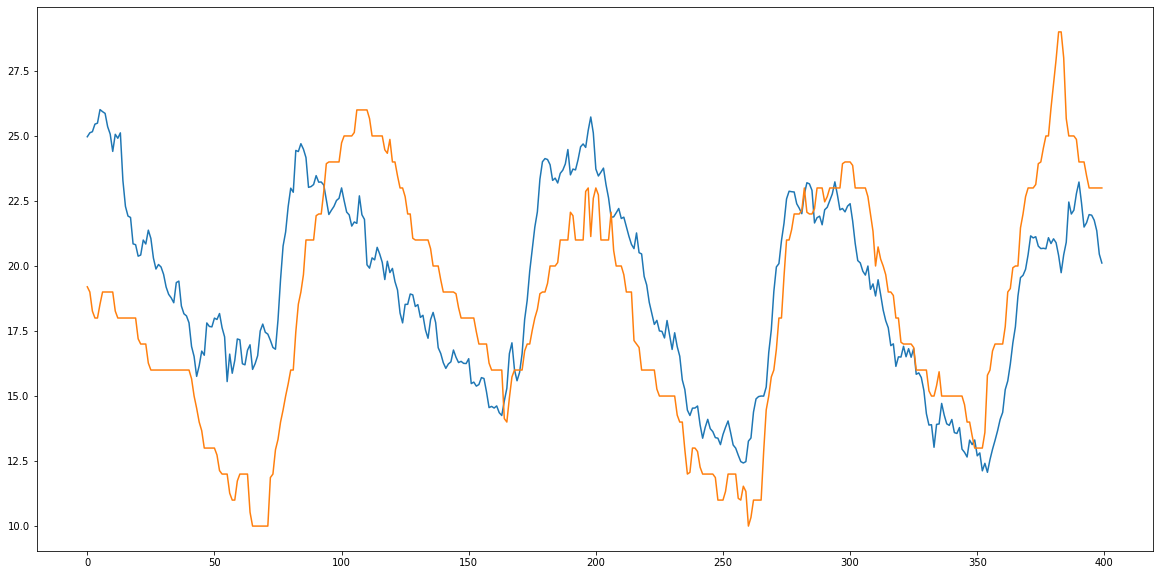

Saving...
Iter:  1 train:  0.12464082383082795 val:  0.1398994705073437
Iter time:  1.6164976820000447
Saving...
Iter:  2 train:  0.09679230341280894 val:  0.12383279942014061
Iter time:  1.5655998370000361
Saving...
Iter:  3 train:  0.08320549610644748 val:  0.10804089389666384
Iter time:  1.5640746540000237
Saving...
Iter:  4 train:  0.06944149106628346 val:  0.09081892084265511
Iter time:  1.561722022999902
Saving...
Iter:  5 train:  0.05753976096524053 val:  0.08638041194462041
Iter time:  1.5965503470000613
Saving...
Iter:  6 train:  0.05043667147671785 val:  0.07928461792836361
Iter time:  1.6033837489999314
Saving...
Iter:  7 train:  0.04521021604331016 val:  0.07450481522803194
Iter time:  1.5719006379999882
Saving...
Iter:  8 train:  0.04009345100413045 val:  0.07137882251616641
Iter time:  1.5768999619999704
Iter:  9 train:  0.039362406423243304 val:  0.07356248021186297
Iter time:  1.5688170619999937
Iter:  10 train:  0.041134462398583566 val:  0.07664161360683418
Iter time:

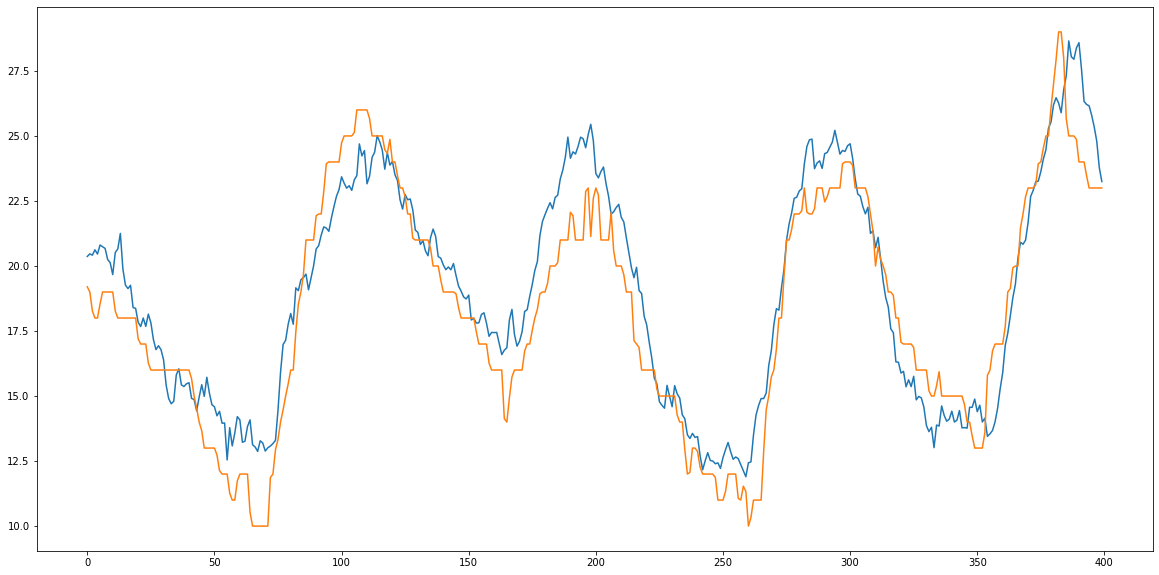

Saving...
Iter:  11 train:  0.03916855523149995 val:  0.06864793554400142
Iter time:  1.5872564659999853
Iter:  12 train:  0.03822331293746613 val:  0.07064256946433203
Iter time:  1.5941629980000016
Iter:  13 train:  0.038223039605670826 val:  0.06985001574323609
Iter time:  1.6226689669999814
Saving...
Iter:  14 train:  0.0356085571553523 val:  0.06834493593583274
Iter time:  1.6141477890000715
Iter:  15 train:  0.03237876395809858 val:  0.07000308568573699
Iter time:  1.6034968380000691
Iter:  16 train:  0.03354303294609981 val:  0.06924097596642684
Iter time:  1.6063722829999278
Iter:  17 train:  0.029900492604961873 val:  0.06898887058008715
Iter time:  1.643158999000093
Iter:  18 train:  0.02980697441668715 val:  0.06847529188175219
Iter time:  1.6770297440000377
Saving...
Iter:  19 train:  0.029603418304728703 val:  0.06656297477588663
Iter time:  1.6122588639999549
Saving...
Iter:  20 train:  0.028649245704895177 val:  0.06539546868855667
Iter time:  1.644147865999912
mse:  2.0

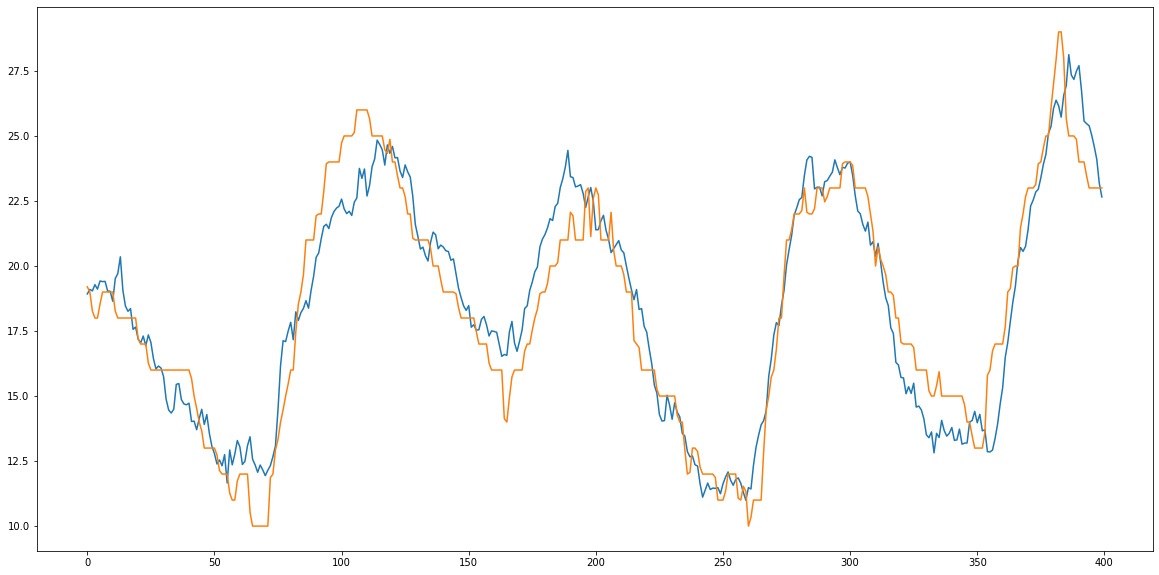

Iter:  21 train:  0.02745192847584204 val:  0.06889669876551914
Iter time:  1.6333795369999962
Iter:  22 train:  0.03010035795946402 val:  0.07480656693689655
Iter time:  1.619312597999965
Iter:  23 train:  0.027909008905182022 val:  0.06559218128172238
Iter time:  1.6218147619999854
Iter:  24 train:  0.026681702788775283 val:  0.06667146286748754
Iter time:  1.621960796000053
Saving...
Iter:  25 train:  0.0271981208844205 val:  0.06522119668804605
Iter time:  1.6331748090000247
Iter:  26 train:  0.025874713220568023 val:  0.06752029408583153
Iter time:  1.6381495110000515
Iter:  27 train:  0.024581821129628343 val:  0.06877889486550419
Iter time:  1.6600236790000054
Iter:  28 train:  0.02464432773982098 val:  0.0682300038262082
Iter time:  1.6684397610000588
Saving...
Iter:  29 train:  0.02402193163432732 val:  0.06382832730236701
Iter time:  1.6458187319999524
Iter:  30 train:  0.02320031875290098 val:  0.0653666679586903
Iter time:  1.656681060999972
mse:  2.0680356 mae:  1.1707388


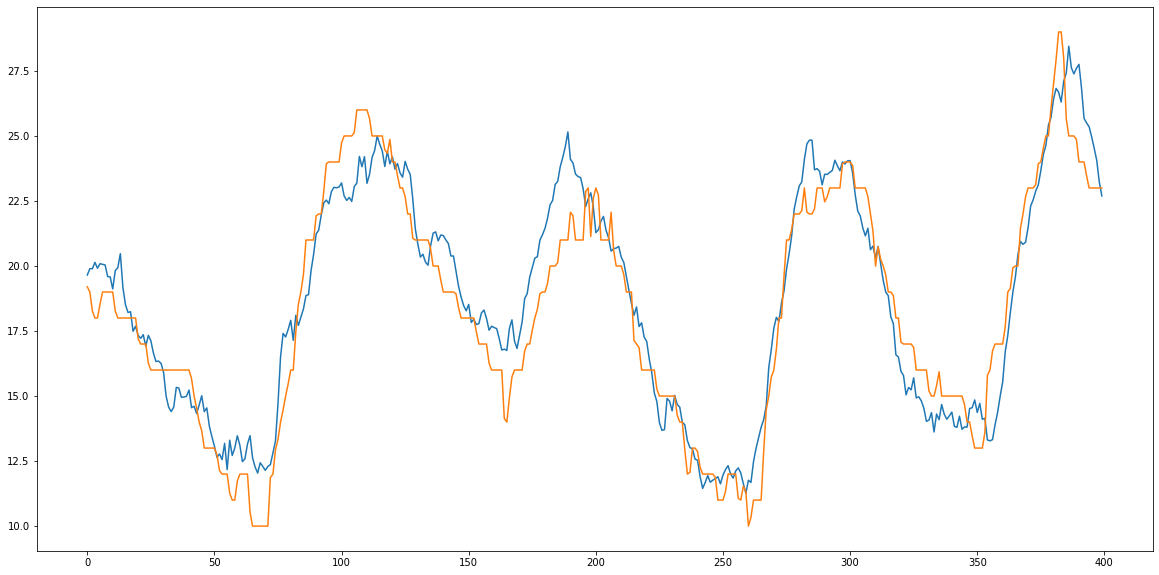

Iter:  31 train:  0.024240813392202774 val:  0.0644871605970931
Iter time:  1.6749534369999992
Saving...
Iter:  32 train:  0.022775603054571044 val:  0.06366595229001684
Iter time:  1.6608371319999833
Iter:  33 train:  0.02304498541235644 val:  0.06491272199630607
Iter time:  1.6543811959999175
Iter:  34 train:  0.022568821318900745 val:  0.06444860326915959
Iter time:  1.6651966079999738
Iter:  35 train:  0.02321229801980235 val:  0.06426713464245117
Iter time:  1.6946188130000337
Iter:  36 train:  0.02289367306061227 val:  0.06433011627960533
Iter time:  1.647028750000004
Iter:  37 train:  0.023599712333965094 val:  0.06608187438022597
Iter time:  1.6465745049999896
Iter:  38 train:  0.02684437032920018 val:  0.06450242959943153
Iter time:  1.6350278300000127
Saving...
Iter:  39 train:  0.022803969163322703 val:  0.06249865470868895
Iter time:  1.6502751740000576
Iter:  40 train:  0.022440189416929164 val:  0.06510184096314921
Iter time:  1.6368903549999914
mse:  2.051313 mae:  1.157

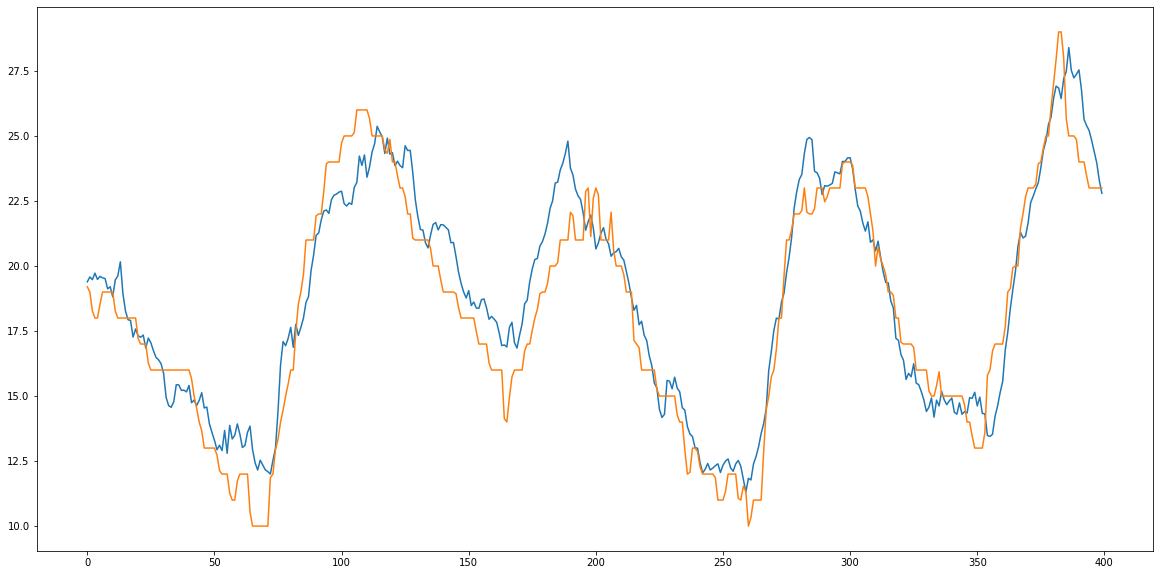

Iter:  41 train:  0.022169114094567902 val:  0.06618236724288018
Iter time:  1.628848760999972
Iter:  42 train:  0.020409586021289786 val:  0.06285848240428413
Iter time:  1.6564481529999284
Iter:  43 train:  0.02119311490453525 val:  0.06576085305614227
Iter time:  1.6297162030000436
Iter:  44 train:  0.019903021523924123 val:  0.06436403851330728
Iter time:  1.6240278559999979
Iter:  45 train:  0.018970989505479947 val:  0.06405605859471984
Iter time:  1.6260242560000506
Iter:  46 train:  0.020805157096641644 val:  0.06376798373764624
Iter time:  1.7252530439999418
Iter:  47 train:  0.023056426573804637 val:  0.07079314460347358
Iter time:  1.6646648910000295
Iter:  48 train:  0.02312068684880859 val:  0.06568113889028705
Iter time:  1.6152691669999513
Iter:  49 train:  0.021209897930296855 val:  0.06502870815209393
Iter time:  1.6403223910000406
Iter:  50 train:  0.02105115659081827 val:  0.0640352004895825
Iter time:  1.6364379799999824
mse:  1.9846454 mae:  1.1285684


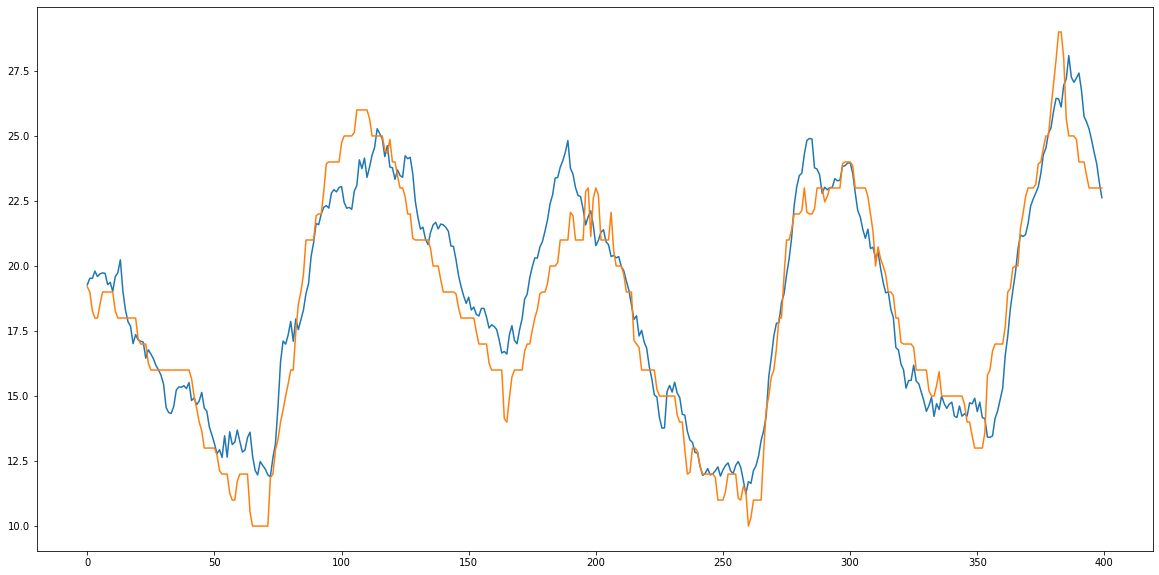

Iter:  51 train:  0.018878512052550166 val:  0.06255529967278037
Iter time:  1.6131625410000652
Iter:  52 train:  0.020178357573229926 val:  0.06332642920459179
Iter time:  1.6125555019999638
Saving...
Iter:  53 train:  0.020645998463067257 val:  0.062288405643752265
Iter time:  1.622842956999989
Saving...
Iter:  54 train:  0.018973771463858306 val:  0.062111768586442594
Iter time:  1.623739578000027
Iter:  55 train:  0.018410244981268302 val:  0.06638228152182708
Iter time:  1.6078871280000158
Iter:  56 train:  0.018562338595112925 val:  0.06230983533489758
Iter time:  1.6353320979999353
Iter:  57 train:  0.019329510566383077 val:  0.06394056572886907
Iter time:  1.6444139949999226
Saving...
Iter:  58 train:  0.0174835726682307 val:  0.06169957424398316
Iter time:  1.6102666890000137
Iter:  59 train:  0.017109901973611157 val:  0.06350862558914072
Iter time:  1.606833345000041
Iter:  60 train:  0.019769794581062386 val:  0.06374085907756355
Iter time:  1.609770868000055
mse:  1.966442

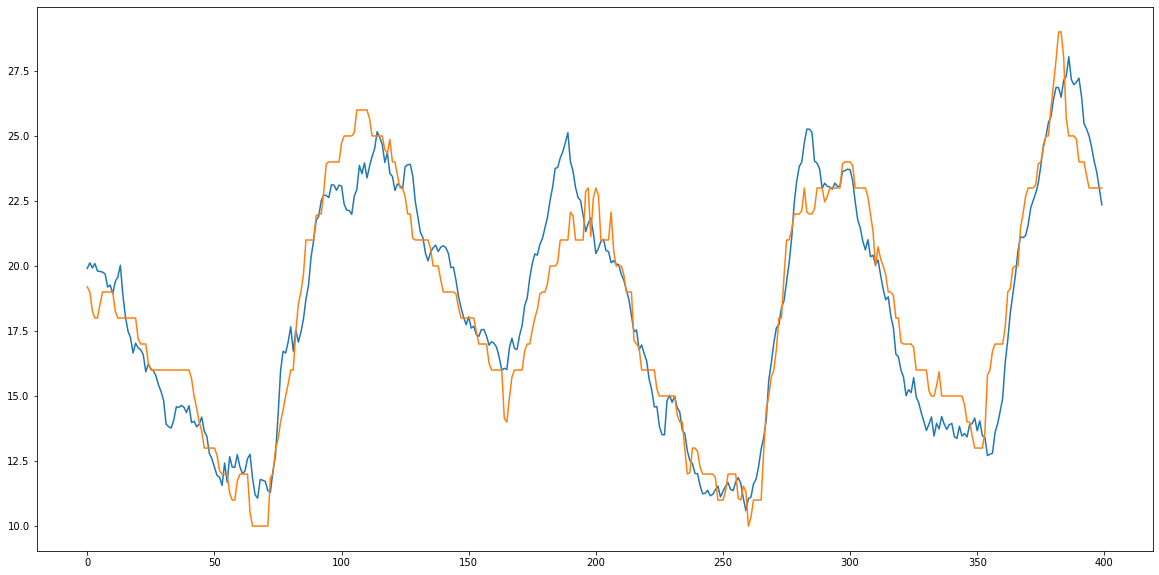

Iter:  61 train:  0.0187276893510842 val:  0.0628071786692733
Iter time:  1.6014350780000086
Iter:  62 train:  0.01690631259188101 val:  0.06178233848591185
Iter time:  1.605514507999942
Saving...
Iter:  63 train:  0.016852979197571574 val:  0.06112383938099001
Iter time:  1.6092681760000005
Iter:  64 train:  0.01974019082561948 val:  0.06128556116920932
Iter time:  1.6557721020000145
Iter:  65 train:  0.016937144792218934 val:  0.06133739802237585
Iter time:  1.61832080399995
Iter:  66 train:  0.018151361801464257 val:  0.06149991963495648
Iter time:  1.619217519000017
Iter:  67 train:  0.019891134598889988 val:  0.0634219295438507
Iter time:  1.6363025549999293
Iter:  68 train:  0.019897442834135397 val:  0.06253888112887138
Iter time:  1.6472973830000228
Iter:  69 train:  0.021853666731946872 val:  0.06603963319438662
Iter time:  1.614673971000002
Iter:  70 train:  0.021372173435304967 val:  0.06131517340336945
Iter time:  1.6191559349999807
mse:  1.8196225 mae:  1.0704991


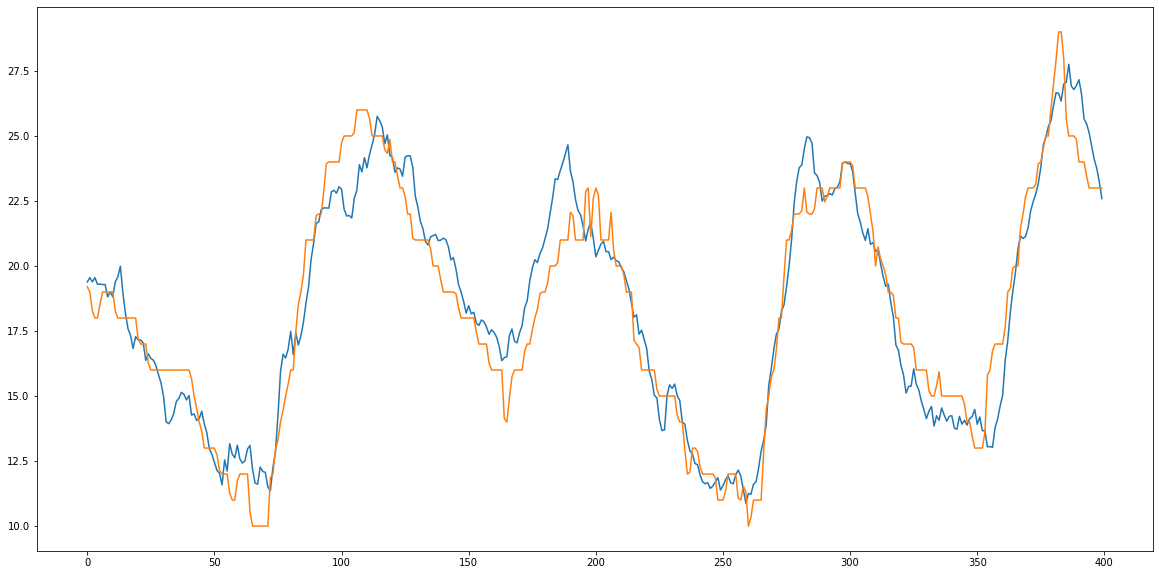

Saving...
Iter:  71 train:  0.019781270286051856 val:  0.06084008744927303
Iter time:  1.654289320000089
Saving...
Iter:  72 train:  0.017044486686269684 val:  0.06038939823913143
Iter time:  1.6524025680000705
Iter:  73 train:  0.01800325541793932 val:  0.06243819280093014
Iter time:  1.618069074999994
Iter:  74 train:  0.017230008316388948 val:  0.06088674170548162
Iter time:  1.6227307049999808
Iter:  75 train:  0.01550299181395679 val:  0.06083284570482747
Iter time:  1.6209256029999324
Saving...
Iter:  76 train:  0.017661370637044337 val:  0.06020601307436138
Iter time:  1.6297717569999577
Iter:  77 train:  0.01756235866568096 val:  0.06129371655786986
Iter time:  1.6308773980000524
Iter:  78 train:  0.016968740092945023 val:  0.06485140694945495
Iter time:  1.6351153010000417
Iter:  79 train:  0.018450575037600326 val:  0.061329618211049944
Iter time:  1.6680673179999985
Iter:  80 train:  0.017524032465543193 val:  0.06084892257256309
Iter time:  1.6251425359999985
mse:  1.792054

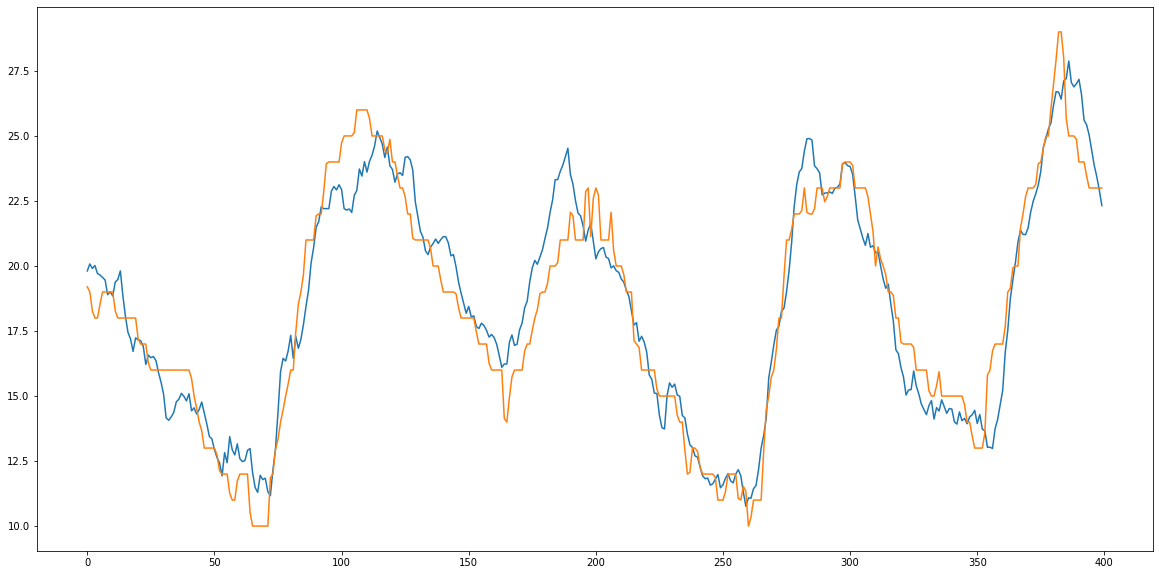

Iter:  81 train:  0.015761553151774778 val:  0.062370188880377604
Iter time:  1.631422090000001
Saving...
Iter:  82 train:  0.017533189611044653 val:  0.059869319741898915
Iter time:  1.6390920569999707
Iter:  83 train:  0.014620925311848571 val:  0.06145691135884336
Iter time:  1.634632947
Iter:  84 train:  0.01592951650648712 val:  0.06290225949092552
Iter time:  1.625851742000009
Iter:  85 train:  0.0147460744767062 val:  0.06217891935235186
Iter time:  1.6269193390000964
Iter:  86 train:  0.017280516186761827 val:  0.061390964544497606
Iter time:  1.6631478279999783
Iter:  87 train:  0.016803764411848377 val:  0.06117226802095557
Iter time:  1.6457427980000148
Iter:  88 train:  0.01776207940410419 val:  0.06194130376453802
Iter time:  1.6301724969999896
Iter:  89 train:  0.017186594730640232 val:  0.0602532790165285
Iter time:  1.633419316999948
Saving...
Iter:  90 train:  0.016200923517691857 val:  0.0597951370502035
Iter time:  1.639163066999913
mse:  1.7305217 mae:  1.0366552


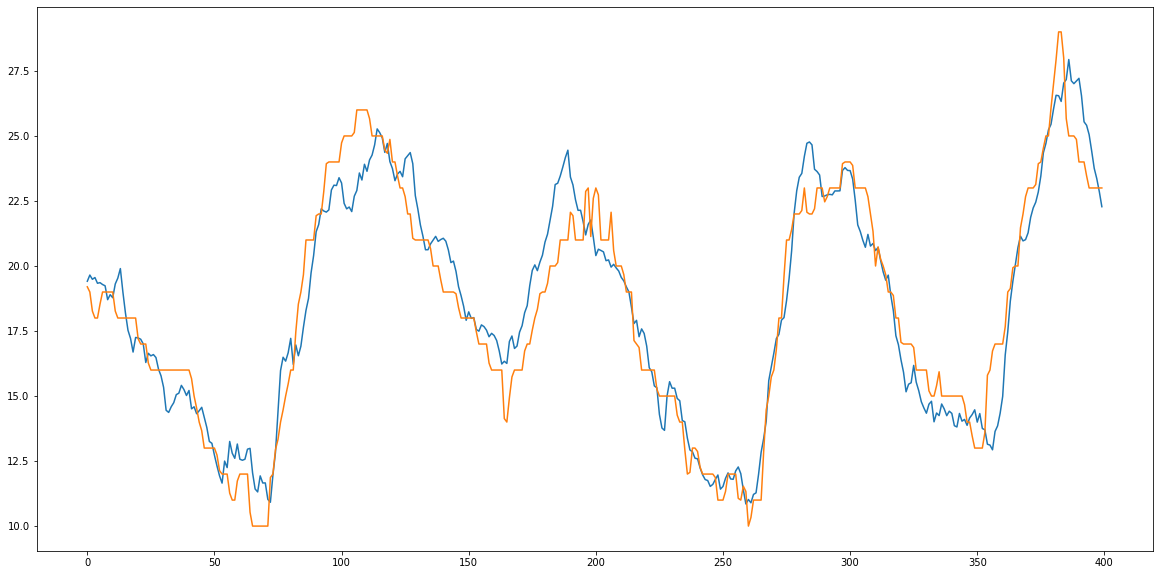

Iter:  91 train:  0.014732017516232428 val:  0.0619227367185226
Iter time:  1.6280827850000605
Iter:  92 train:  0.013902718170935809 val:  0.061158452735532574
Iter time:  1.6259504289999995
Iter:  93 train:  0.013881779742700022 val:  0.06183614822371068
Iter time:  1.648841247000064
Iter:  94 train:  0.013955063823138455 val:  0.06143078942798145
Iter time:  1.6480199879999873
Iter:  95 train:  0.013801769995418498 val:  0.06280883422517035
Iter time:  1.6209279450000622
Iter:  96 train:  0.01716739690557126 val:  0.06262270177928073
Iter time:  1.6201707210000222
Iter:  97 train:  0.01460041753133786 val:  0.062262738016129665
Iter time:  1.622597697999936
Saving...
Iter:  98 train:  0.0139916586069294 val:  0.059758236060559626
Iter time:  1.6221065099999805
Iter:  99 train:  0.014030688914076037 val:  0.0607627980876078
Iter time:  1.6214201310000362
Iter:  100 train:  0.016720530160807916 val:  0.06066160990466631
Iter time:  1.6321949230000428
mse:  1.7810382 mae:  1.0542434


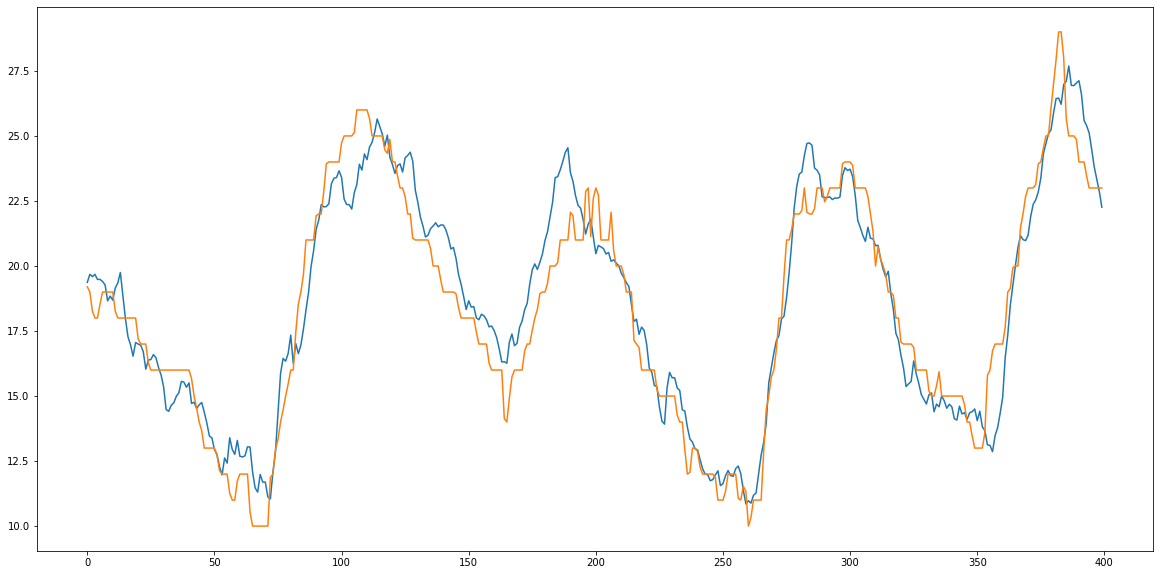

Iter:  101 train:  0.014409207250402395 val:  0.06042954613164186
Iter time:  1.6525077720000354
Iter:  102 train:  0.014163947741537576 val:  0.062284810234824066
Iter time:  1.6193698130000485
Iter:  103 train:  0.012400932948659588 val:  0.061301708758437885
Iter time:  1.6190636940000331
Iter:  104 train:  0.014139388691218358 val:  0.06308209906554399
Iter time:  1.6315837710000096
Iter:  105 train:  0.012356035371973785 val:  0.06055674503233136
Iter time:  1.6485328170000457
Iter:  106 train:  0.014144460561701787 val:  0.0640579925672662
Iter time:  1.6248666550000053
Iter:  107 train:  0.015802817404137207 val:  0.06217720852931025
Iter time:  1.6203300060000174
Saving...
Iter:  108 train:  0.015692828561637246 val:  0.05936683579832794
Iter time:  1.6692492659999516
Iter:  109 train:  0.015293001334573269 val:  0.06044120982026072
Iter time:  1.6374461940000629
Saving...
Iter:  110 train:  0.016974508143918036 val:  0.05873827118419092
Iter time:  1.622417519999999
mse:  1.66

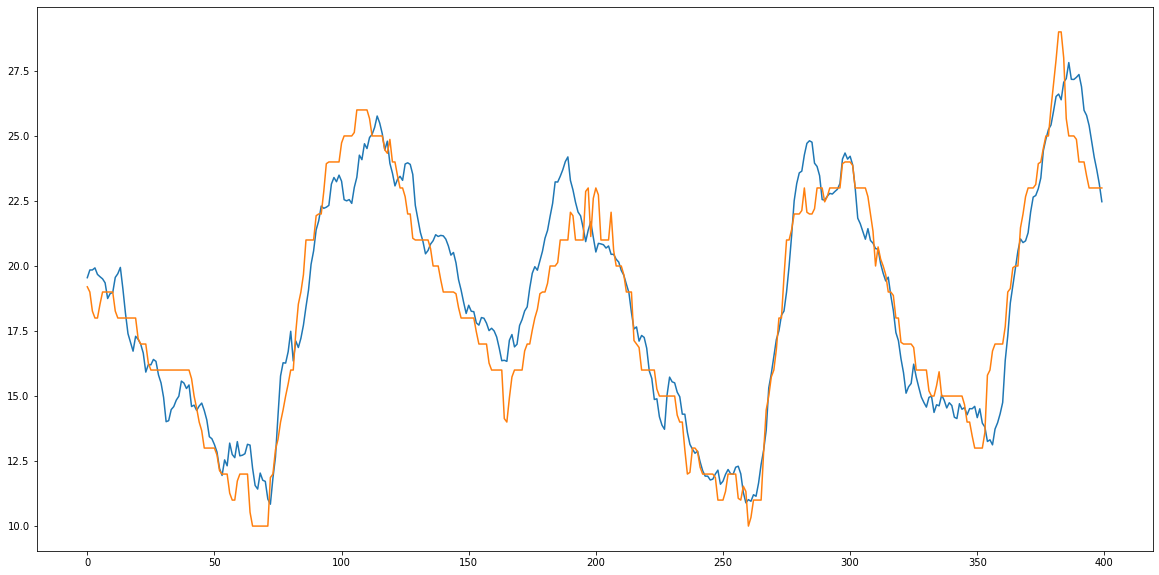

Iter:  111 train:  0.015267337819300831 val:  0.06143831298063212
Iter time:  1.6191532289999486
Iter:  112 train:  0.013594057988467464 val:  0.05968460032275086
Iter time:  1.6205776220000416
Iter:  113 train:  0.013473232140535142 val:  0.05928070523881943
Iter time:  1.6137615799999594
Iter:  114 train:  0.015614419488640204 val:  0.06564051921448223
Iter time:  1.6176946339999176
Iter:  115 train:  0.01716264674025904 val:  0.061600715907150896
Iter time:  1.6418474860000742
Iter:  116 train:  0.01363461900245769 val:  0.06037348284355247
Iter time:  1.6458285690000594
Iter:  117 train:  0.014364155664467465 val:  0.059949891567152046
Iter time:  1.6196878050000123
Iter:  118 train:  0.01507836980453341 val:  0.05990073291116444
Iter time:  1.6223850580000772
Iter:  119 train:  0.013403798052912695 val:  0.05938946083551691
Iter time:  1.7299085229999491
Iter:  120 train:  0.014395566087642612 val:  0.060609249626486304
Iter time:  1.6200379599999906
mse:  1.777965 mae:  1.060893


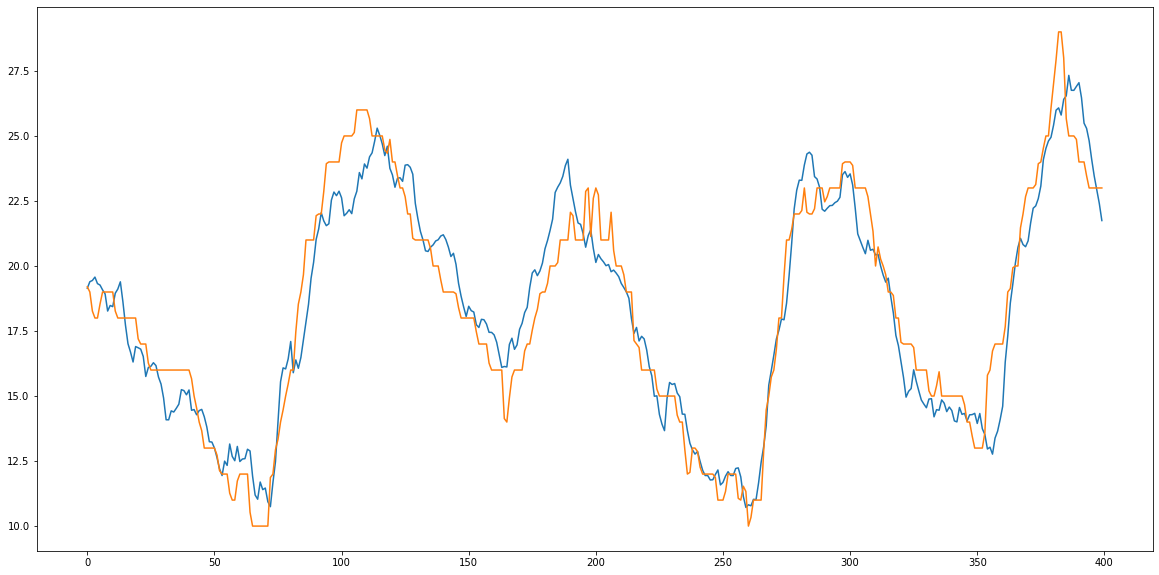

Iter:  121 train:  0.015112747301397916 val:  0.06188123732373965
Iter time:  1.6194323450000638
Iter:  122 train:  0.014104617066316598 val:  0.06216633152461245
Iter time:  1.6306032979999827
Iter:  123 train:  0.011330119674199618 val:  0.06400928962425077
Iter time:  1.6537089460000516
Iter:  124 train:  0.011059003036500892 val:  0.059966399288869134
Iter time:  1.6187415809999948
Iter:  125 train:  0.011769677559428286 val:  0.06112341701958038
Iter time:  1.616656856000077
Iter:  126 train:  0.012512650348260197 val:  0.05928232071547544
Iter time:  1.6211962630000016
Iter:  127 train:  0.011634779166631063 val:  0.06005262546812925
Iter time:  1.6168332160000318
Iter:  128 train:  0.011791328567953974 val:  0.060306547252870484
Iter time:  1.6178015079999568
Iter:  129 train:  0.012188353590547856 val:  0.06359701553602119
Iter time:  1.6216143530000409
Iter:  130 train:  0.013390262846707498 val:  0.060616970095789716
Iter time:  1.6505864869999414
mse:  1.778418 mae:  1.05683

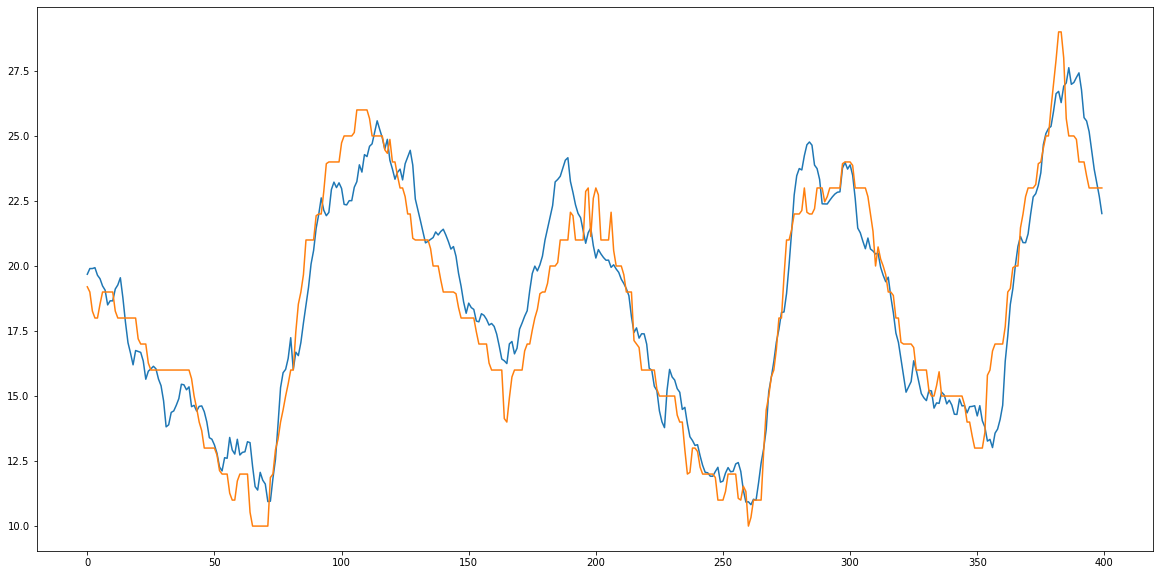

Iter:  131 train:  0.011487208438498417 val:  0.06139962226102237
Iter time:  1.6370110320000322
Iter:  132 train:  0.011947618765675365 val:  0.06272170025491977
Iter time:  1.620458959000075
Iter:  133 train:  0.011678630948173018 val:  0.06177291575653289
Iter time:  1.6143217669999785
Iter:  134 train:  0.012627025276746928 val:  0.0604834522811565
Iter time:  1.618343528999958
Iter:  135 train:  0.01726323522253862 val:  0.06382391189668597
Iter time:  1.6145381489999409
Saving...
Iter:  136 train:  0.01316911479530198 val:  0.058353855664874804
Iter time:  1.6251184369999692
Iter:  137 train:  0.012050053002230741 val:  0.05859552587361106
Iter time:  1.6382786090000536
Iter:  138 train:  0.012798513393561447 val:  0.05917446535190866
Iter time:  1.6542530559999022
Iter:  139 train:  0.012975142806981125 val:  0.060633892164238076
Iter time:  1.6190017530000205
Iter:  140 train:  0.011262400017679869 val:  0.059737631531159706
Iter time:  1.6286853159999737
mse:  1.7271948 mae:  

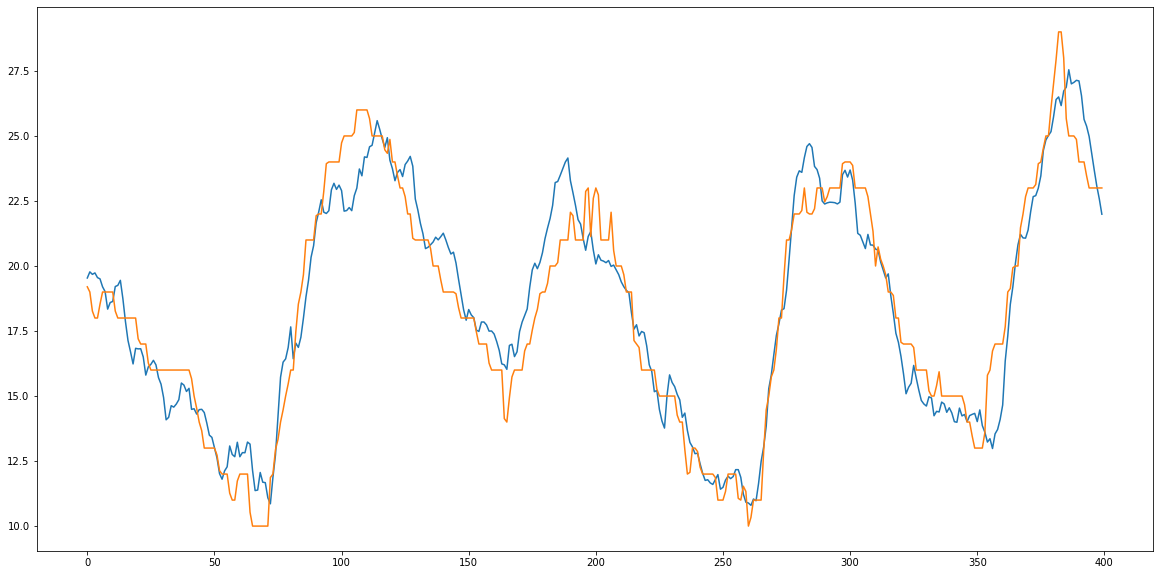

Iter:  141 train:  0.011296762646910492 val:  0.05962799000340671
Iter time:  1.6333838329999253
Iter:  142 train:  0.010339577916246323 val:  0.062387821734490576
Iter time:  1.655749804999914
Iter:  143 train:  0.013965002880375664 val:  0.05858715465302255
Iter time:  1.619561933
Iter:  144 train:  0.015158941700895351 val:  0.059606810785839306
Iter time:  1.6369643660000293
Iter:  145 train:  0.013269392537537306 val:  0.05997094372190297
Iter time:  1.6538120660000004
Iter:  146 train:  0.012508558354309642 val:  0.05983369759026596
Iter time:  1.6211452459999691
Iter:  147 train:  0.01257801250806119 val:  0.05911346482102397
Iter time:  1.6167675250000002
Iter:  148 train:  0.01142528108374012 val:  0.06046805850823858
Iter time:  1.6175424430000476
Iter:  149 train:  0.010959354098863127 val:  0.06282747427056219
Iter time:  1.625002343999995
Iter:  150 train:  0.011694508457850665 val:  0.06101820443302268
Iter time:  1.6203454800000827
mse:  1.8020391 mae:  1.0608968


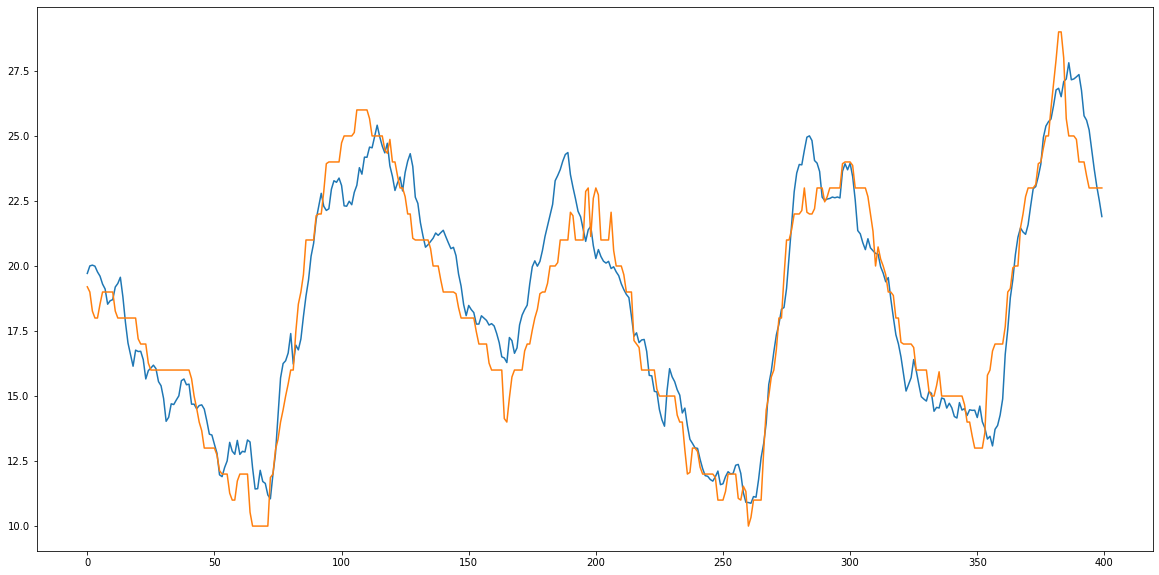

Iter:  151 train:  0.01472822258855192 val:  0.061309616673379815
Iter time:  1.6216141740000012
Iter:  152 train:  0.012394819508228697 val:  0.060411560148347435
Iter time:  1.6557578309999599
Iter:  153 train:  0.014463296945356603 val:  0.060577666543874344
Iter time:  1.6349209769999788
Iter:  154 train:  0.012214991726882295 val:  0.06161104715851288
Iter time:  1.6216733309998972
Iter:  155 train:  0.013615411378199294 val:  0.061231461658367
Iter time:  1.6170077669999046
Iter:  156 train:  0.013317005958155229 val:  0.0587502460715538
Iter time:  1.6187050700000327
Iter:  157 train:  0.01349338670178561 val:  0.05987822795670135
Iter time:  1.6198938069999258
Iter:  158 train:  0.011865962644160205 val:  0.05877272103129129
Iter time:  1.6188945270000659
Iter:  159 train:  0.011296028144815987 val:  0.060931070917836554
Iter time:  1.6399275239999724
Iter:  160 train:  0.009875037546367219 val:  0.06068294494105264
Iter time:  1.6615104779999683
mse:  1.7822909 mae:  1.046003


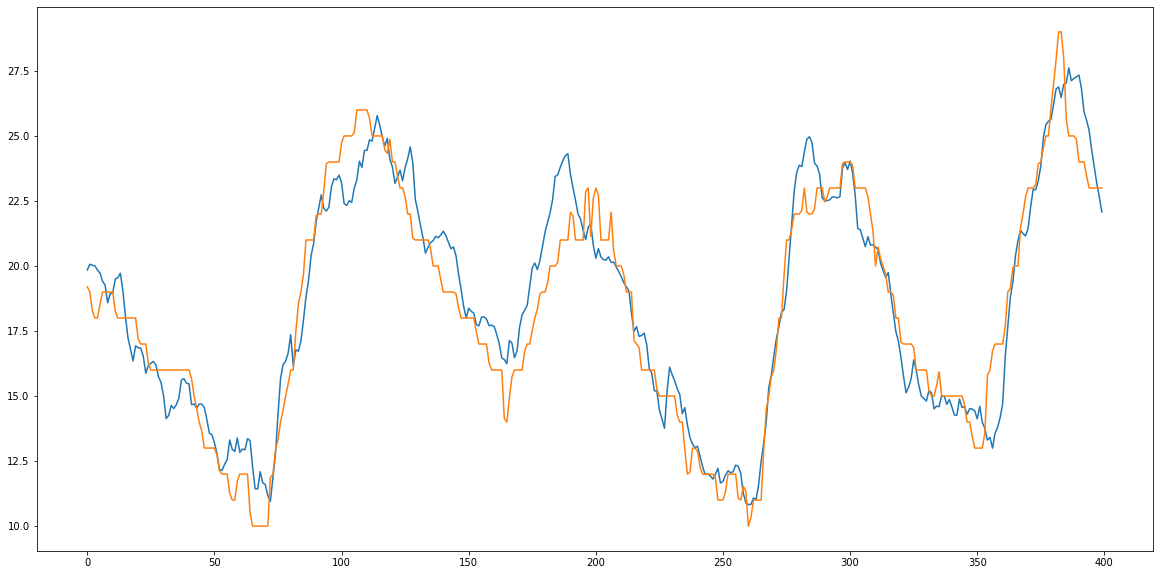

Iter:  161 train:  0.01106470617642285 val:  0.0625181502571349
Iter time:  1.6203364830000737
Iter:  162 train:  0.009625314613107512 val:  0.06024180032553493
Iter time:  1.6210115439999981
Iter:  163 train:  0.010082728077954257 val:  0.06121796719146498
Iter time:  1.616642739000099
Iter:  164 train:  0.009756412580861205 val:  0.06037626779303244
Iter time:  1.621216206999975
Iter:  165 train:  0.010147537552770647 val:  0.06068479733828184
Iter time:  1.6166209279999748
Iter:  166 train:  0.009900246123360774 val:  0.06250774871952601
Iter time:  1.614962300000002
Iter:  167 train:  0.009322722061600843 val:  0.060213143828602475
Iter time:  1.6555446440000878
Iter:  168 train:  0.00976618751751487 val:  0.05970576894871421
Iter time:  1.6279962789999445
Iter:  169 train:  0.010331756171545154 val:  0.06006832664214737
Iter time:  1.625757986999929
Iter:  170 train:  0.009118308801096103 val:  0.05984165927531619
Iter time:  1.6190208380000968
mse:  1.7332157 mae:  1.0304215


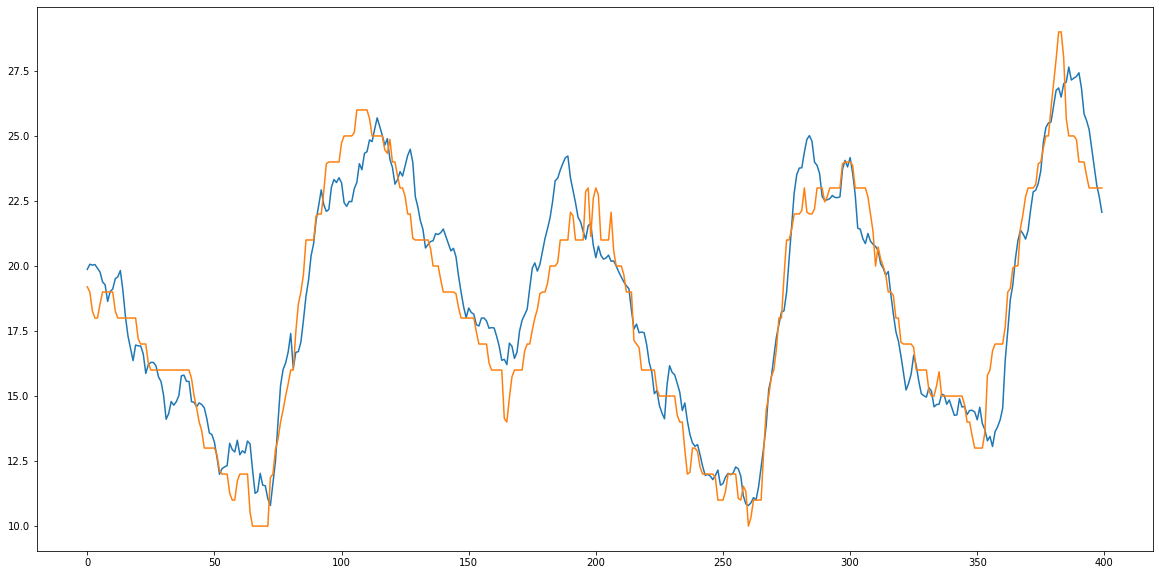

Iter:  171 train:  0.00925121150615312 val:  0.06003425508163204
Iter time:  1.624122629999988
Iter:  172 train:  0.009498659750128594 val:  0.060144762081727254
Iter time:  1.6221316879999677
Iter:  173 train:  0.010195737748470074 val:  0.060753583912254
Iter time:  1.6174405760000354
Iter:  174 train:  0.00895806896544883 val:  0.06089758238029945
Iter time:  1.6517322390000118
Iter:  175 train:  0.009866634218846187 val:  0.061784377998620944
Iter time:  1.6412116520000382
Iter:  176 train:  0.010874090650996518 val:  0.06203008184606234
Iter time:  1.6224367429999802
Iter:  177 train:  0.010153496304558182 val:  0.06080892214879693
Iter time:  1.6206354699997974
Iter:  178 train:  0.008799473029292498 val:  0.06099624369929898
Iter time:  1.6359724159999587
Iter:  179 train:  0.010661970024911345 val:  0.060452059369371085
Iter time:  1.6526171739999427
Iter:  180 train:  0.008824280150222524 val:  0.060326326519790786
Iter time:  1.6245054520002213
mse:  1.7614045 mae:  1.0438176

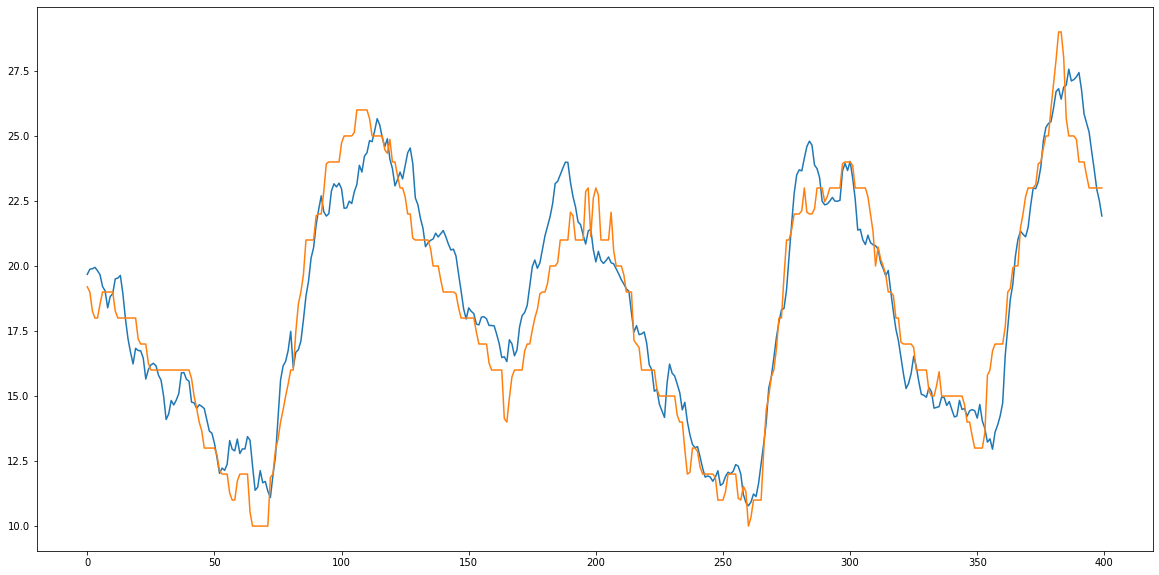

Iter:  181 train:  0.008016527160454515 val:  0.06032161586930907
Iter time:  1.6386133490000248
Iter:  182 train:  0.00925417060645453 val:  0.05940516044644959
Iter time:  1.6533983650001574
Iter:  183 train:  0.010165336140687764 val:  0.06031976559710586
Iter time:  1.6242925330000162
Iter:  184 train:  0.008822159475327352 val:  0.060161890966807026
Iter time:  1.6265058139999837
Iter:  185 train:  0.011261990694018197 val:  0.06087868554298945
Iter time:  1.619494123000095
Iter:  186 train:  0.010963245203864604 val:  0.058755237252063414
Iter time:  1.6194513600000846
Iter:  187 train:  0.010722729163337521 val:  0.05936787822952575
Iter time:  1.6135982700000113
Iter:  188 train:  0.011523695941515118 val:  0.06327882220473674
Iter time:  1.6209386989999075
Iter:  189 train:  0.010421728288788169 val:  0.06179307494313244
Iter time:  1.6729428329999791
Iter:  190 train:  0.008898092534921517 val:  0.06030231274909141
Iter time:  1.6292992719997983
mse:  1.7600025 mae:  1.039898

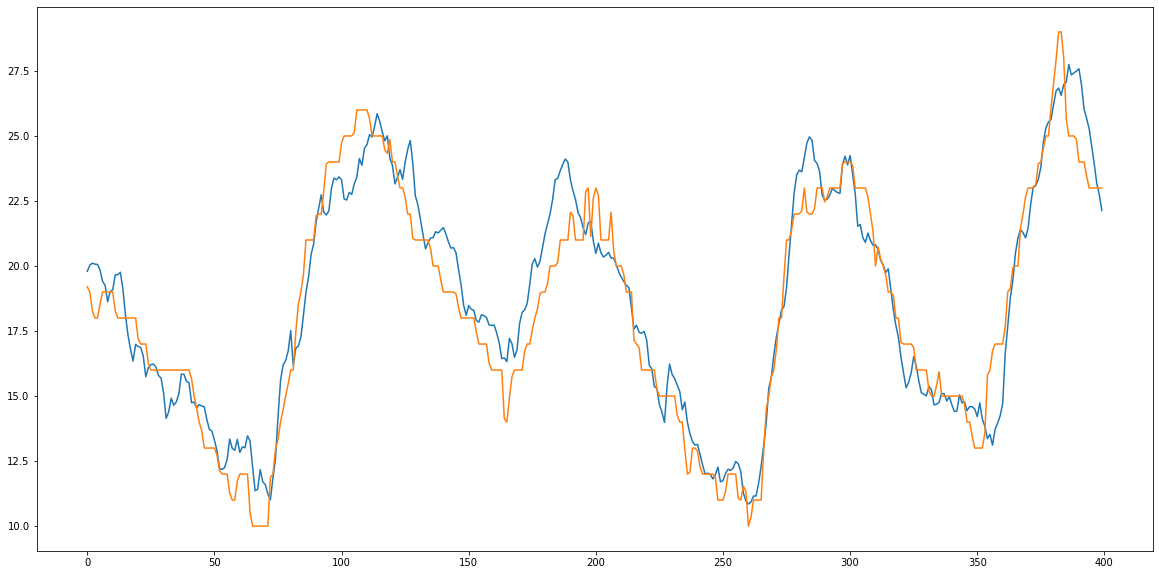

Iter:  191 train:  0.00847049385903885 val:  0.06338966642712339
Iter time:  1.613803383000004
Iter:  192 train:  0.008052949522480297 val:  0.059483149186959385
Iter time:  1.6202348429999347
Iter:  193 train:  0.009012610090335134 val:  0.060753198527190626
Iter time:  1.6206474030000209
Iter:  194 train:  0.00850882862549308 val:  0.0600836089226989
Iter time:  1.620998734000068
Iter:  195 train:  0.0082252812202881 val:  0.06029860571191107
Iter time:  1.6176459840000916
Iter:  196 train:  0.00955353485635879 val:  0.060963116054578256
Iter time:  1.639301655999816
Iter:  197 train:  0.009699732631620989 val:  0.06234547735751577
Iter time:  1.6477628039999672
Iter:  198 train:  0.012609438552622563 val:  0.05956023678227437
Iter time:  1.6149688479999895
Iter:  199 train:  0.009196253729830387 val:  0.061049130785457546
Iter time:  1.6232512750000296
Iter:  200 train:  0.008155491658804396 val:  0.059521935940814084
Iter time:  1.6153696909998416
mse:  1.7147447 mae:  1.0260686


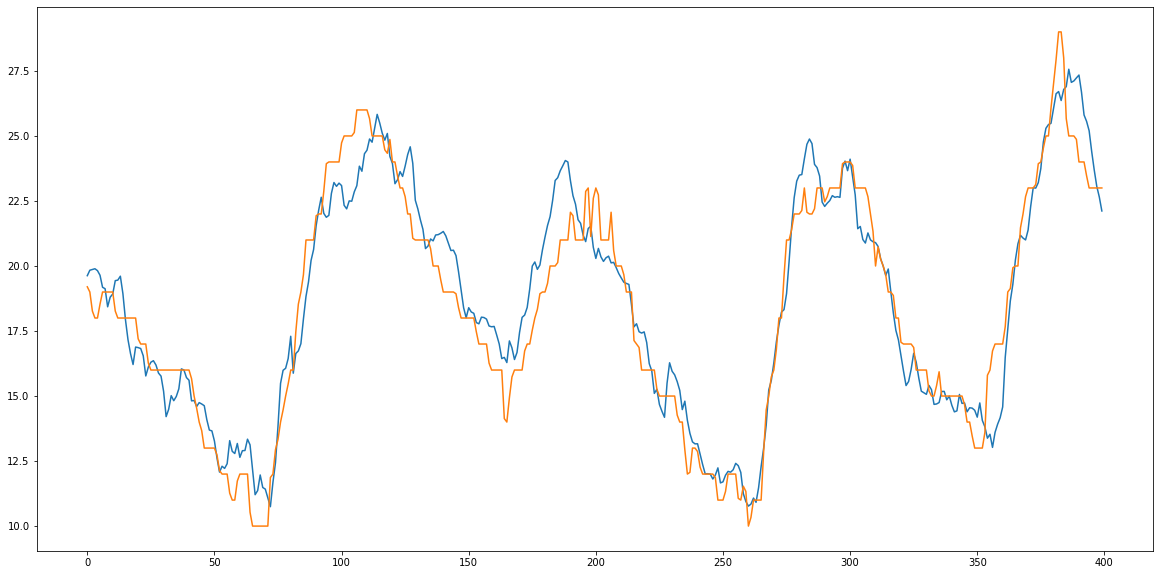

Iter:  201 train:  0.009993743365755143 val:  0.06353220745459133
Iter time:  1.6162127540001165
Iter:  202 train:  0.008506306077581563 val:  0.06071561281097194
Iter time:  1.6195979080000598
Iter:  203 train:  0.008918895036903884 val:  0.0604556163489917
Iter time:  1.6355402689998755
Iter:  204 train:  0.011749119839351266 val:  0.06307485028323602
Iter time:  1.6560343239998474
Iter:  205 train:  0.010521618911107861 val:  0.05960986278429351
Iter time:  1.6201764489999277
Iter:  206 train:  0.010395171756364004 val:  0.06031164589954101
Iter time:  1.62440274100004
Iter:  207 train:  0.007957822935482223 val:  0.060699295036041635
Iter time:  1.6181121520000943
Iter:  208 train:  0.007728823227027479 val:  0.05980658716913411
Iter time:  1.6222586809999484
Iter:  209 train:  0.007413573940663864 val:  0.05954713933511168
Iter time:  1.6233316810000815
Iter:  210 train:  0.008722924127601658 val:  0.060217568184005546
Iter time:  1.6131993760000114
mse:  1.7550594 mae:  1.033341


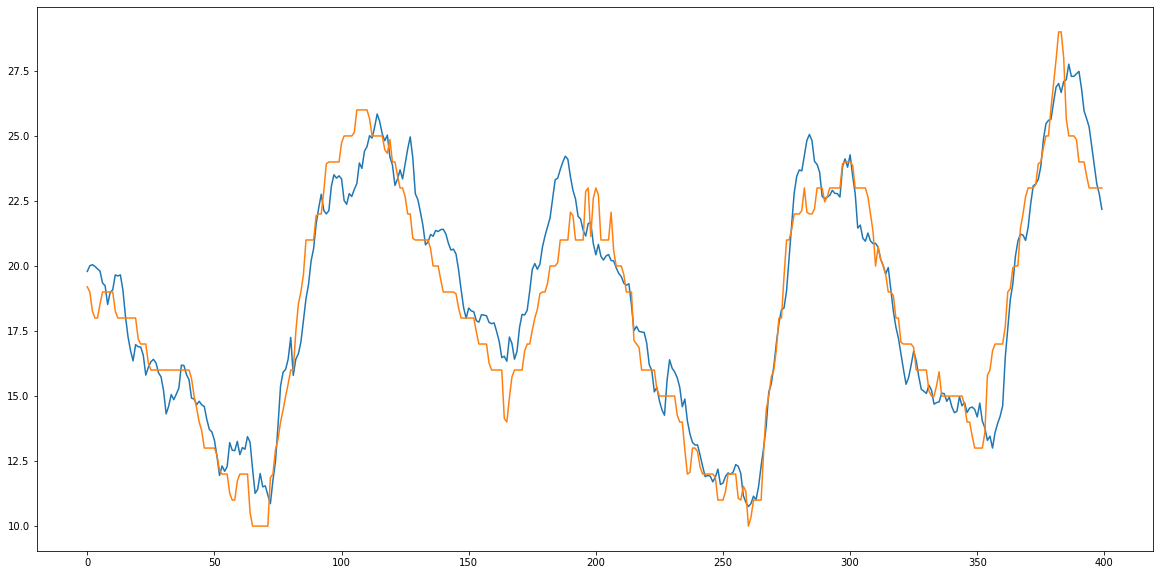

In [36]:
epochs = 1000
loss = nn.MSELoss()
patience = 75
min_val_loss = 9999
counter = 0
for i in range(epochs):
    mse_train = 0
    iteration_start = time.monotonic()
    for batch_x, batch_y in train_loader :
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        opt.zero_grad()
        y_pred = model(batch_x)
        y_pred = y_pred.squeeze(1)
        l = loss(y_pred, batch_y)
        l.backward()
        mse_train += l.item()*batch_x.shape[0]
        opt.step()
    epoch_scheduler.step()
    with torch.no_grad():
        mse_val = 0
        preds = []
        true = []
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            output = model(batch_x)
            output = output.squeeze(1)
            preds.append(output.detach().cpu().numpy())
            true.append(batch_y.detach().cpu().numpy())
            mse_val += loss(output, batch_y).item()*batch_x.shape[0]
    preds = np.concatenate(preds)
    true = np.concatenate(true)
    
    if min_val_loss > mse_val**0.5:
        min_val_loss = mse_val**0.5
        print("Saving...")
        torch.save(model.state_dict(), "convrnn_sml2010.pt")
        counter = 0
    else: 
        counter += 1
    
    if counter == patience:
        break
    print("Iter: ", i, "train: ", (mse_train/len(X_train_t))**0.5, "val: ", (mse_val/len(X_val_t))**0.5)
    iteration_end = time.monotonic()
    print("Iter time: ", iteration_end - iteration_start)
    if(i % 10 == 0):
        preds = preds*(y_train_max - y_train_min) + y_train_min
        true = true*(y_train_max - y_train_min) + y_train_min
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)
        print("mse: ", mse, "mae: ", mae)
        plt.figure(figsize=(20, 10))
        plt.plot(preds)
        plt.plot(true)
        plt.show()

In [37]:
model.load_state_dict(torch.load("convrnn_sml2010.pt"))

<All keys matched successfully>

In [38]:
with torch.no_grad():
    mse_val = 0
    preds = []
    true = []
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        output = model(batch_x)
        output = output.squeeze(1)
        preds.append(output.detach().cpu().numpy())
        true.append(batch_y.detach().cpu().numpy())
        mse_val += loss(output, batch_y).item()*batch_x.shape[0]
preds = np.concatenate(preds)
true = np.concatenate(true)

In [39]:
preds = preds*(y_train_max - y_train_min) + y_train_min
true = true*(y_train_max - y_train_min) + y_train_min

In [40]:
mse = mean_squared_error(true, preds)
mae = mean_absolute_error(true, preds)

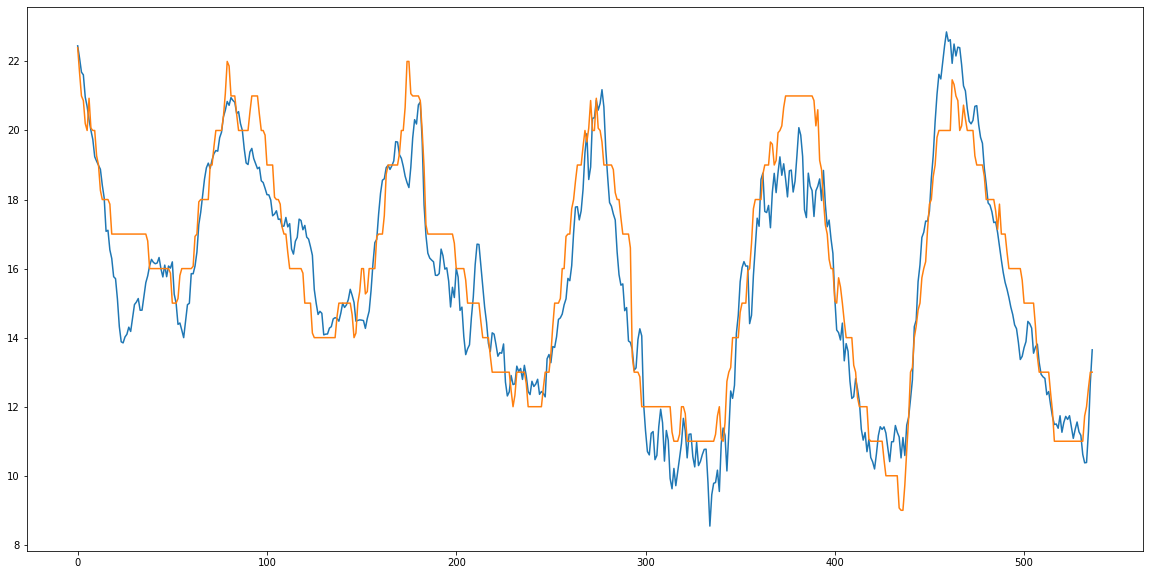

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(preds)
plt.plot(true)
plt.show()